In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Load the data

In [3]:
feature_names = ["thickness_small", "thickness_medium", "thickness_large", "thickness_xlarge",
                 "width_small", "width_medium", "width_large", "width_xlarge",
                 "length_small", "length_medium", "length_large", "length_xlarge"]

class_names = ["6", "8", "9"]

# mapping from feature index to feature name
feature_index_to_name = {i: feature_name for i, feature_name in enumerate(feature_names)}
# mapping from feature name to feature index
feature_name_to_index = {feature_name: i for i, feature_name in enumerate(feature_names)}
# mapping from class index to class name
class_index_to_name = {i: class_name for i, class_name in enumerate(class_names)}
# mapping from class name to class index
class_name_to_index = {class_name: i for i, class_name in enumerate(class_names)}

In [4]:
log_path = "/Users/gouse/PycharmProjects/AR-Imperial-Thesis/saved/log/leakage_inspection/0801_205325"
output_path = "/Users/gouse/PycharmProjects/AR-Imperial-Thesis/saved/models/leakage_inspection/0801_205325/train_dicts"

path_hard_tree = log_path + "/trees/original_tree/"
path_soft_tree = log_path + "/trees/soft_tree/"
path_combined_tree = log_path + "/trees/combined_tree/"

In [5]:
with open(os.path.join(output_path, 'leaf_samples_indices.pkl'), 'rb') as f:
    leaf_samples_indices = pkl.load(f)
with open(os.path.join(output_path, 'leaf_features_per_path.pkl'), 'rb') as f:
    leaf_features_per_path = pkl.load(f)
with open(os.path.join(output_path, 'new_leaves_per_leaf_samples_indices.pkl'), 'rb') as f:
    new_leaves_per_leaf_samples_indices = pkl.load(f)
with open(os.path.join(output_path, 'new_leaves_per_leaf_features_per_path.pkl'), 'rb') as f:
    new_leaves_per_leaf_features_per_path = pkl.load(f)
with open(os.path.join(output_path, 'C_leaf_pred_dict.pkl'), 'rb') as f:
    C_leaf_pred_dict = pkl.load(f)
with open(os.path.join(output_path, 'C_leaf_dict.pkl'), 'rb') as f:
    C_leaf_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_leaf_dict.pkl'), 'rb') as f:
    y_leaf_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_original_pred_dict.pkl'), 'rb') as f:
    y_original_pred_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_pred_dict.pkl'), 'rb') as f:
    y_pred_dict = pkl.load(f)
with open(os.path.join(output_path, 'X_leaf_dict.pkl'), 'rb') as f:
    X_leaf_dict = pkl.load(f)

In [6]:
# map the leaf_samples_indices to a scaling from 0 to n_samples
leaf_samples_indices_mapping = {}
for leaf, samples in leaf_samples_indices.items():
    leaf_samples_indices_mapping[leaf] = {i : samples[i] for i in range(len(samples))}

for leaf, new_leaves in new_leaves_per_leaf_samples_indices.items():
    for new_leaf, samples in new_leaves.items():
        for i in range(len(samples)):
            new_leaves_per_leaf_samples_indices[leaf][new_leaf][i] = leaf_samples_indices_mapping[leaf][samples[i]]

## Plot some digits with x_large length

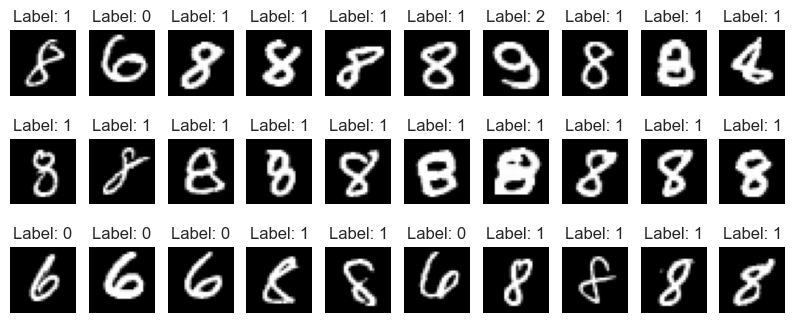

In [35]:
images = X_leaf_dict[18][C_leaf_dict[18][:, 11] == 1]
labels = y_leaf_dict[18][C_leaf_dict[18][:, 11] == 1]

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(3, 10, figsize=(10, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {labels[i * 10 + j]}")
        ax[i, j].axis('off')

## Plot the digits of all classes ending up in leaf 6 in the Hard Tree

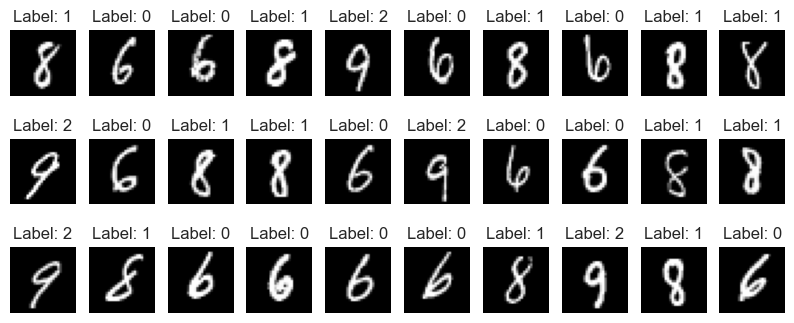

In [42]:
images = X_leaf_dict[6]
labels = y_leaf_dict[6]

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(3, 10, figsize=(10, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {labels[i * 10 + j]}")
        ax[i, j].axis('off')

## Plot the digits of all classes ending up in leaf 7 in the Hard Tree

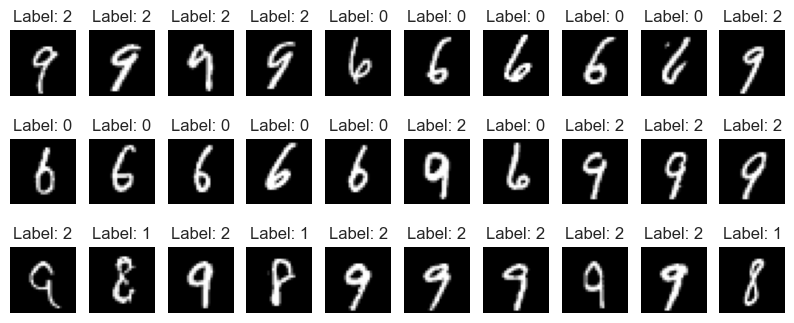

In [43]:
images = X_leaf_dict[7]
labels = y_leaf_dict[7]

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(3, 10, figsize=(10, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {labels[i * 10 + j]}")
        ax[i, j].axis('off')

## Plot the digits of all classes ending up in leaf 10 in the Hard Tree

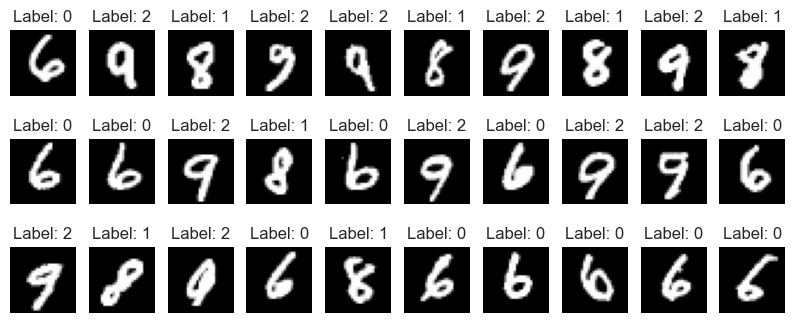

In [44]:
images = X_leaf_dict[10]
labels = y_leaf_dict[10]

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(3, 10, figsize=(10, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {labels[i * 10 + j]}")
        ax[i, j].axis('off')

## Plot the digits of all classes ending up in leaf 18 in the Hard Tree

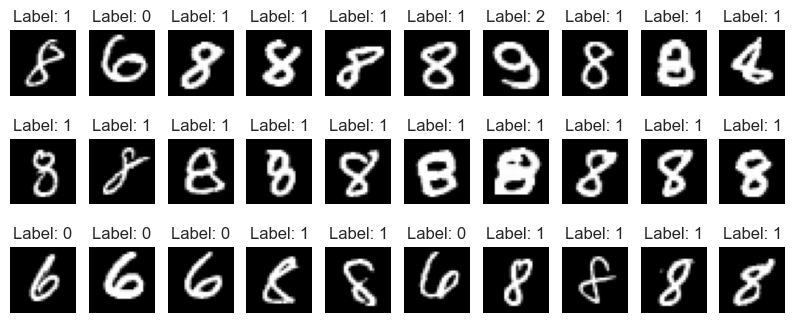

In [37]:
images = X_leaf_dict[18]
labels = y_leaf_dict[18]

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(3, 10, figsize=(10, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {labels[i * 10 + j]}")
        ax[i, j].axis('off')

## Make Box Plots

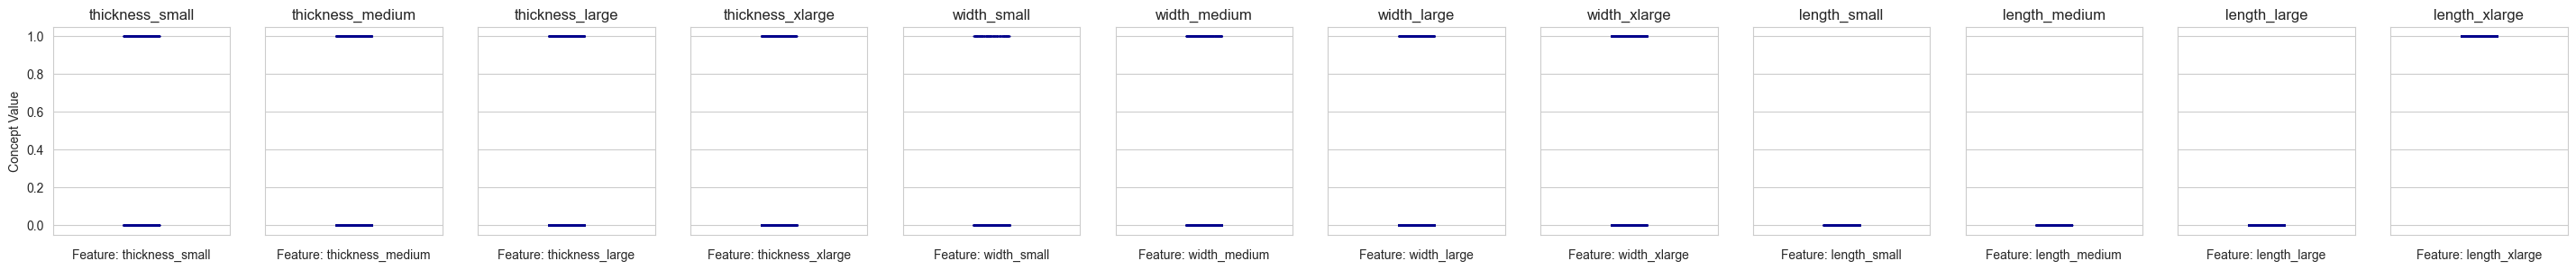

<Figure size 2000x1200 with 0 Axes>

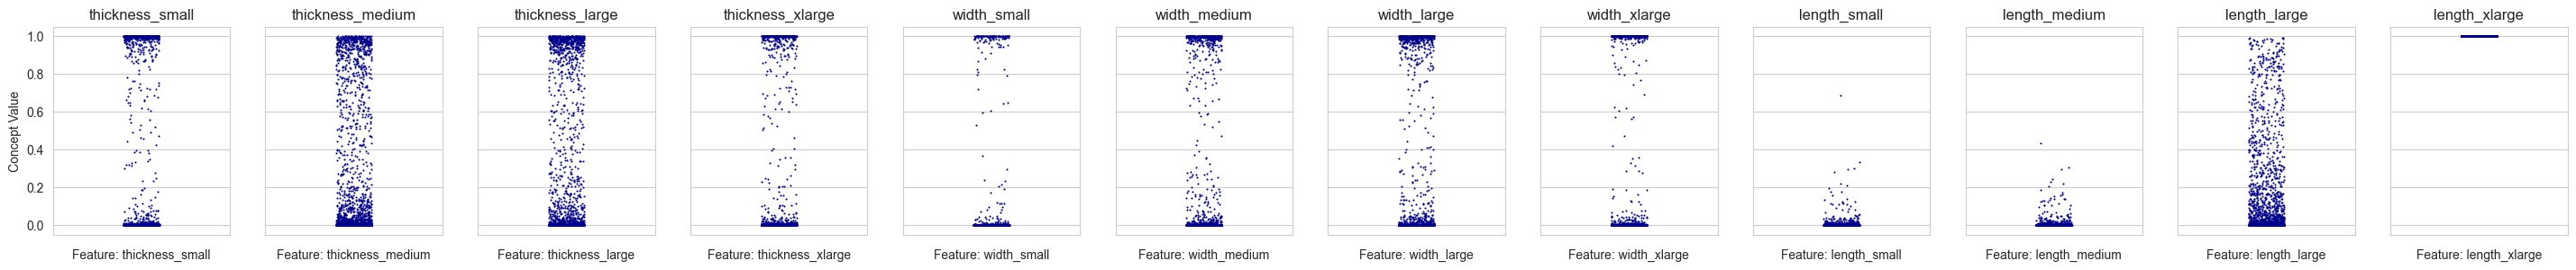

<Figure size 2000x1200 with 0 Axes>

In [71]:
def plot_boxplots_for_path(c, feature_names):

    fig, axs = plt.subplots(1, len(feature_names), figsize=(3*len(feature_names), 3), sharey=True)
    plt.figure(figsize=(20, len(feature_names)))
    
    for i in range(len(feature_names)):
        feature_index = i
        sns.stripplot(y=c[:, feature_index], ax=axs[i], color='darkblue', jitter=True, size=1.5)
        axs[i].set_title(f"{feature_names[i]}")
        axs[i].set_ylabel('Concept Value')
        axs[i].set_xlabel(f'Feature: {feature_names[i]}')
    plt.tight_layout()
    plt.show()
    
plot_boxplots_for_path(C_leaf_dict[18], feature_index_to_name)
plot_boxplots_for_path(C_leaf_pred_dict[18], feature_index_to_name)

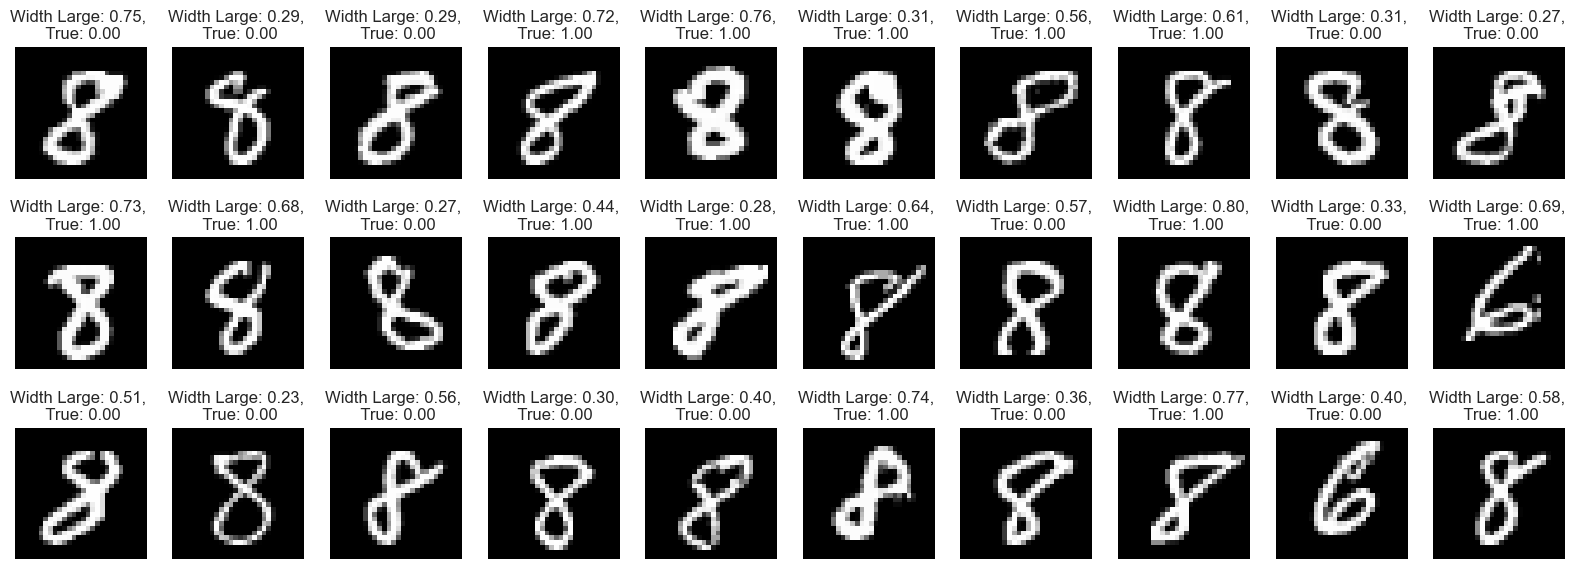

In [76]:
width_large_edge_cases = C_leaf_pred_dict[18][(C_leaf_pred_dict[18][:, 6] > 0.2) & (C_leaf_pred_dict[18][:, 6] < 0.8)][:, 6]
corresponding_X = X_leaf_dict[18][(C_leaf_pred_dict[18][:, 6] > 0.2) & (C_leaf_pred_dict[18][:, 6] < 0.8)]
corresponding_true_C = C_leaf_dict[18][(C_leaf_pred_dict[18][:, 6] > 0.2) & (C_leaf_pred_dict[18][:, 6] < 0.8)]

# plot those edge cases
fig, ax = plt.subplots(3, 10, figsize=(20, 7))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(corresponding_X[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Width Large: {width_large_edge_cases[i * 10 + j]:.2f}, \n True: {corresponding_true_C[i * 10 + j, 6]:.2f}")
        ax[i, j].axis('off')

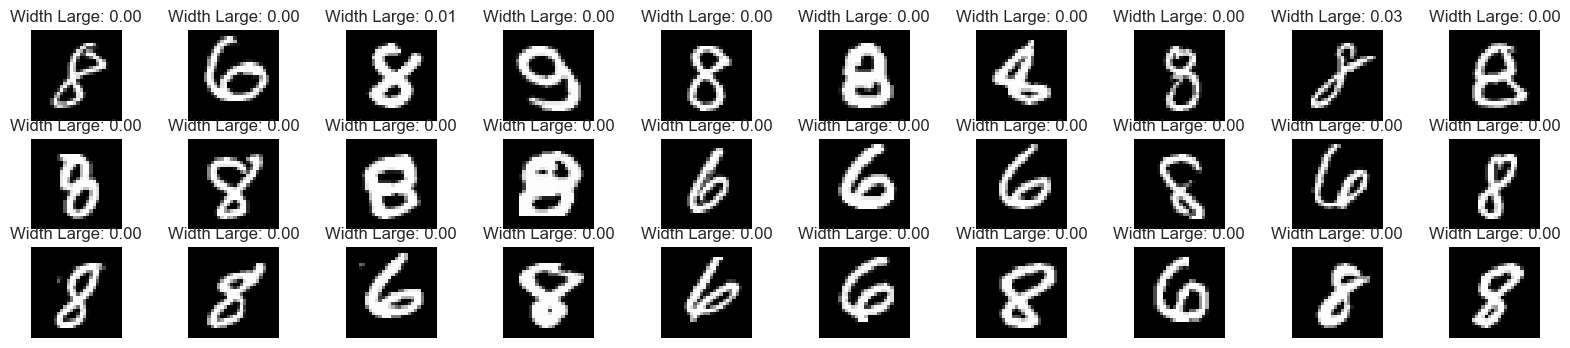

In [69]:
width_large_edge_cases = C_leaf_pred_dict[18][(C_leaf_pred_dict[18][:, 6] < 0.05)][:, 6]
corresponding_X = X_leaf_dict[18][(C_leaf_pred_dict[18][:, 6] < 0.05)]

# plot those edge cases
fig, ax = plt.subplots(3, 10, figsize=(20, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(corresponding_X[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Width Large: {width_large_edge_cases[i * 10 + j]:.2f}")
        ax[i, j].axis('off')

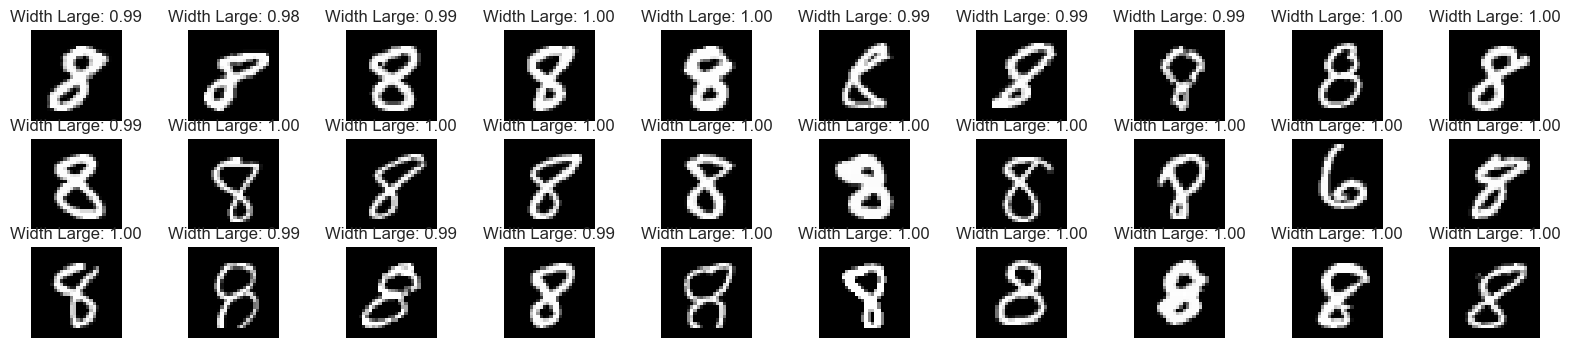

In [70]:
width_large_edge_cases = C_leaf_pred_dict[18][(C_leaf_pred_dict[18][:, 6] > 0.98)][:, 6]
corresponding_X = X_leaf_dict[18][(C_leaf_pred_dict[18][:, 6] > 0.98)]

# plot those edge cases
fig, ax = plt.subplots(3, 10, figsize=(20, 4))
for i in range(3):
    for j in range(10):
        ax[i, j].imshow(corresponding_X[i * 10 + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Width Large: {width_large_edge_cases[i * 10 + j]:.2f}")
        ax[i, j].axis('off')